

**Introduction**

This project investigates patterns and predictors of smartphone usage and social media addiction using a dataset collected from a sample population. The dataset includes demographic information, behavioral metrics, and self-reported measures related to daily screen time and addiction levels. Our goal is to build predictive models to better understand the factors influencing smartphone usage duration and to classify individuals by their addiction risk level. By applying regression and classification techniques, we aim to uncover key drivers of mobile phone addiction and provide insights that could inform targeted interventions and awareness campaigns.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load  data
df = pd.read_csv("/content/mobile_addiction.csv")

# Identify numeric columns
num_cols = df.select_dtypes(include="number").columns.tolist()


target_reg = "daily_screen_time"
target_clf = "addicted"
identifier_cols = ["Unnamed: 0"]

# Remove target and identifier columns from numeric feature list
for col in [target_reg] + identifier_cols:
    if col in num_cols:
        num_cols.remove(col)

print("Numeric features used for visualization:", num_cols)


Numeric features used for visualization: ['app_sessions', 'social_media_usage', 'gaming_time', 'notifications', 'night_usage', 'age', 'work_study_hours', 'stress_level', 'apps_installed']


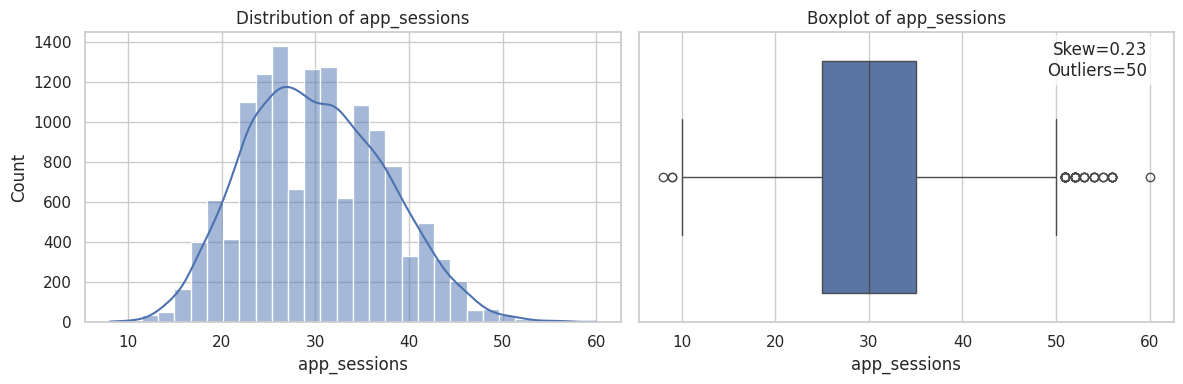

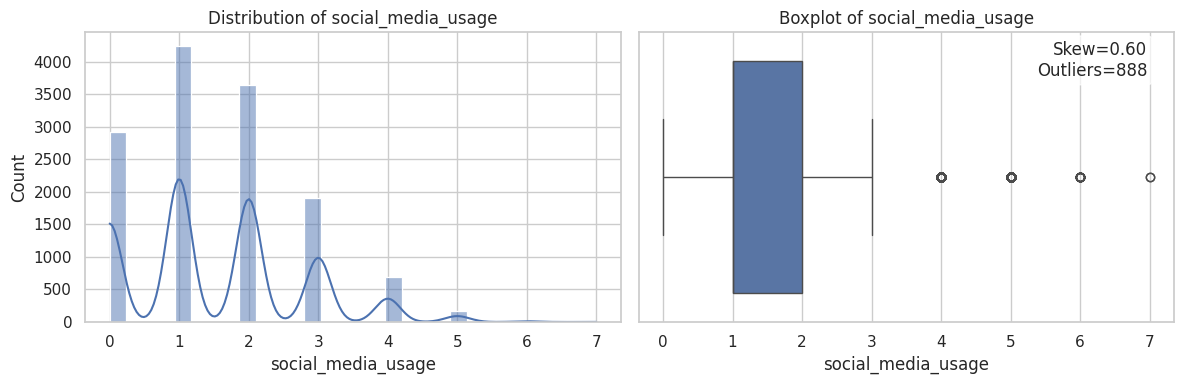

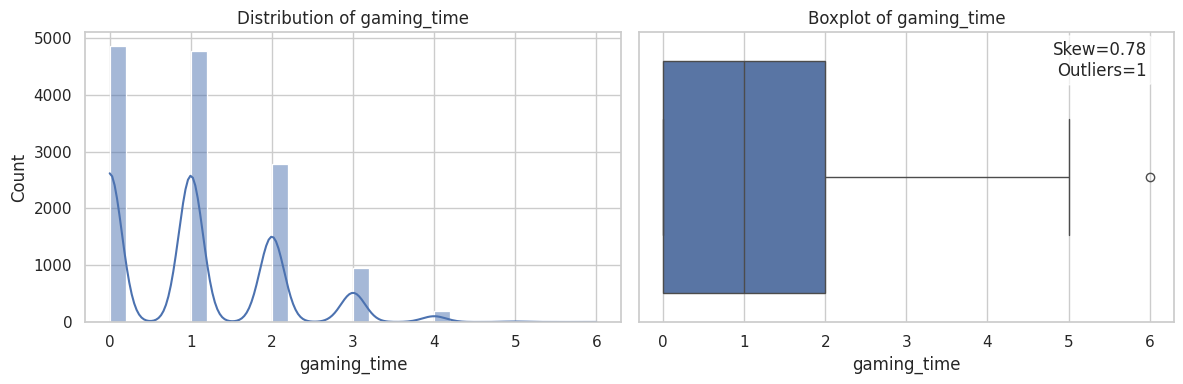

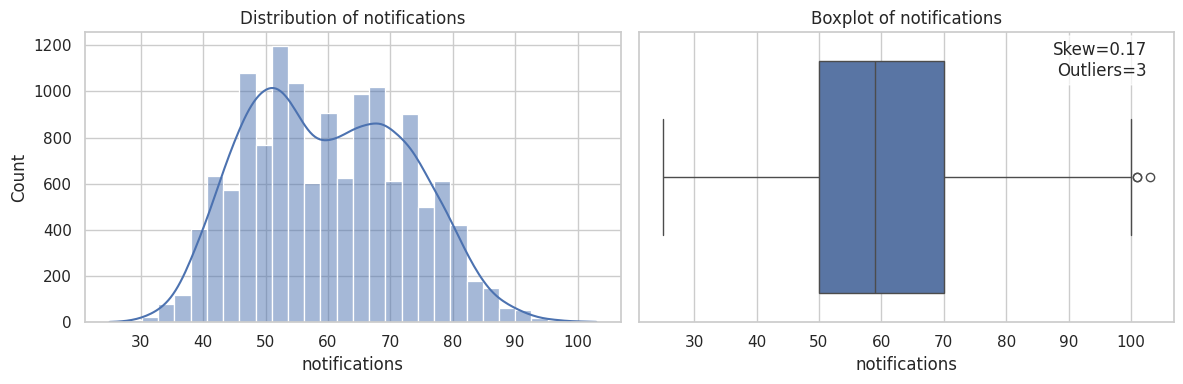

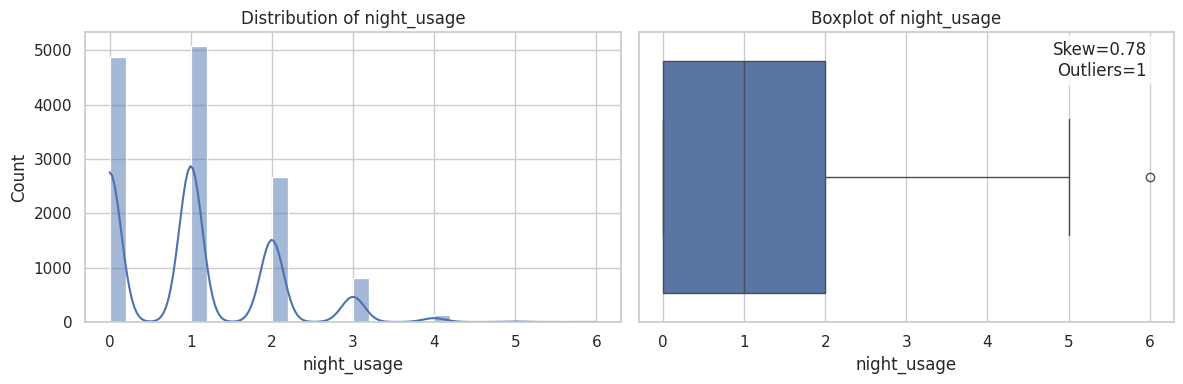

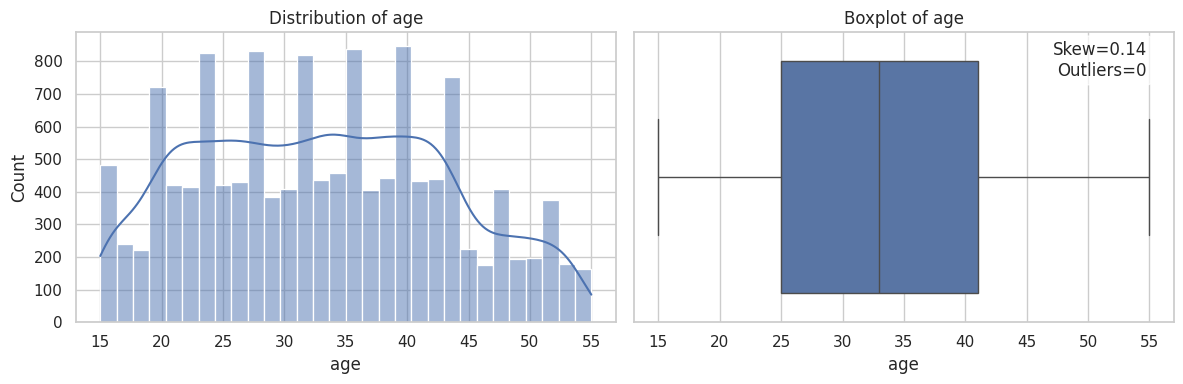

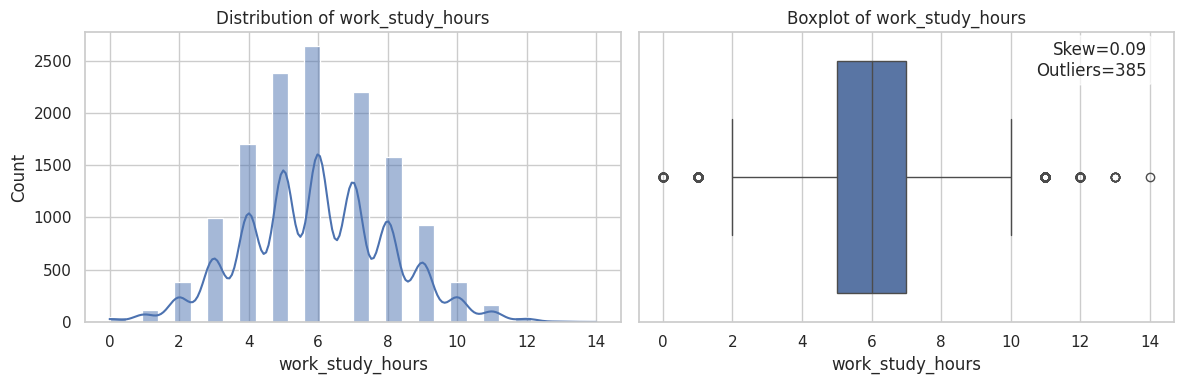

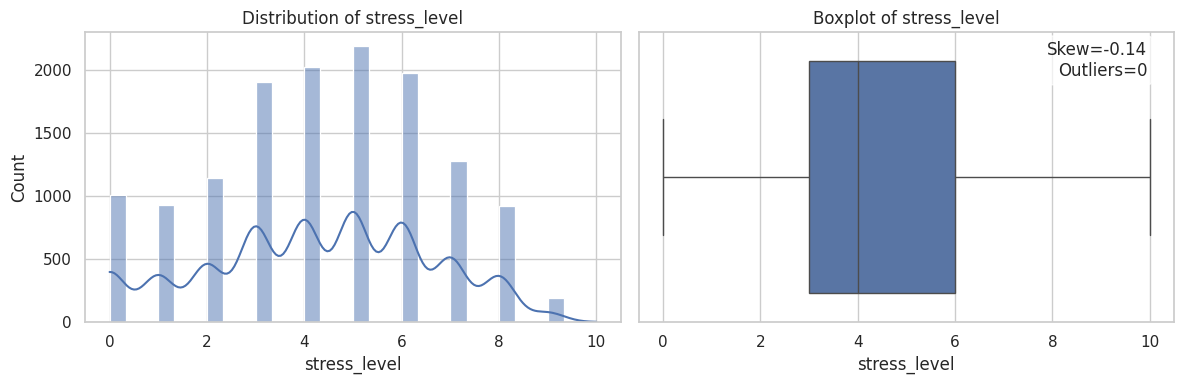

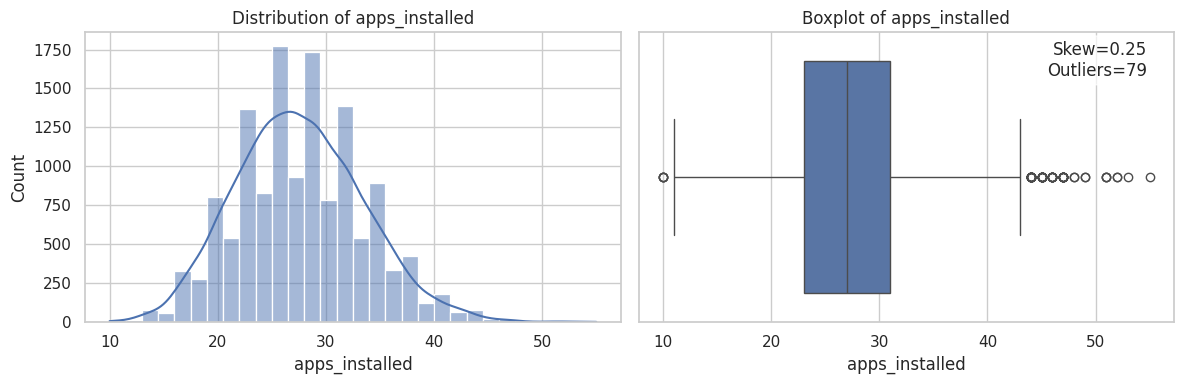

In [4]:
#   Histogram & Boxplot
from scipy.stats import iqr

for col in num_cols:
    series = df[col].dropna()
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

    # Histogram
    sns.histplot(series, bins=30, kde=True, ax=ax1)
    ax1.set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=series, ax=ax2)
    ax2.set_title(f"Boxplot of {col}")

    # Compute skewness and approximate outlier count
    skewness = series.skew()
    bounds = (
        series.quantile(0.25) - 1.5 * iqr(series),
        series.quantile(0.75) + 1.5 * iqr(series)
    )
    outlier_count = ((series < bounds[0]) | (series > bounds[1])).sum()

    # Annotate
    ax2.text(
        0.95, 0.85,
        f"Skew={skewness:.2f}\nOutliers={outlier_count}",
        transform=ax2.transAxes,
        horizontalalignment="right",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
    )

    plt.tight_layout()
    plt.show()


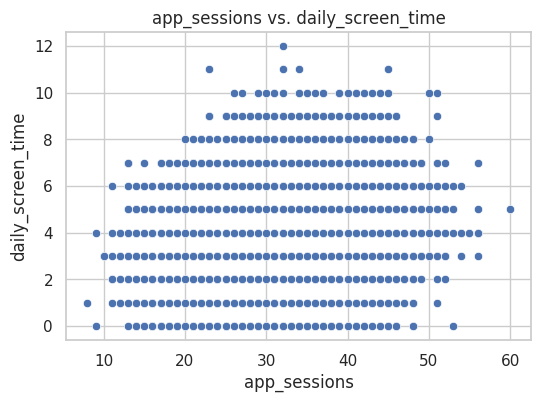

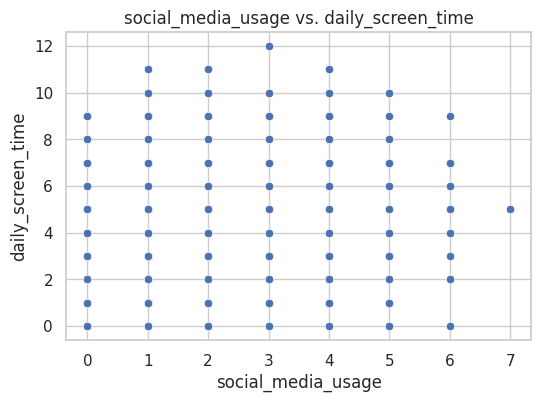

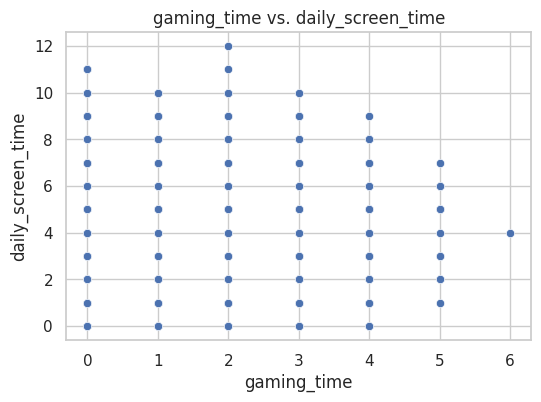

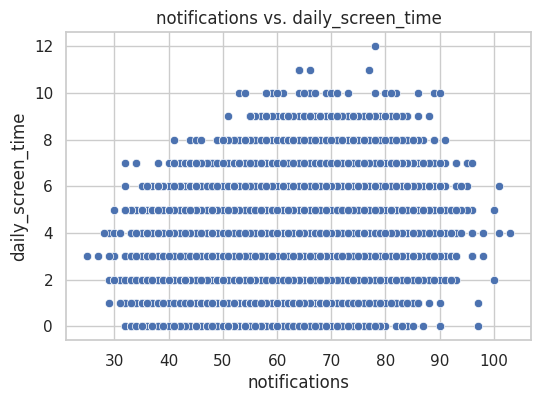

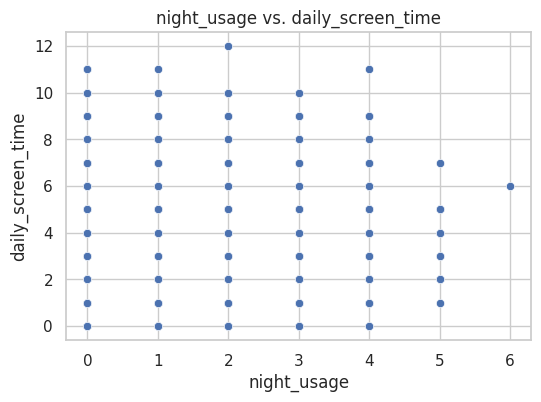

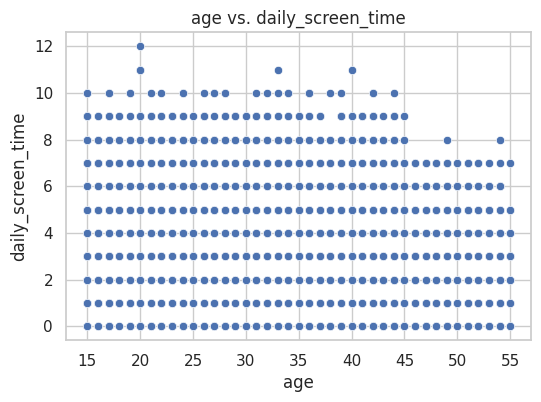

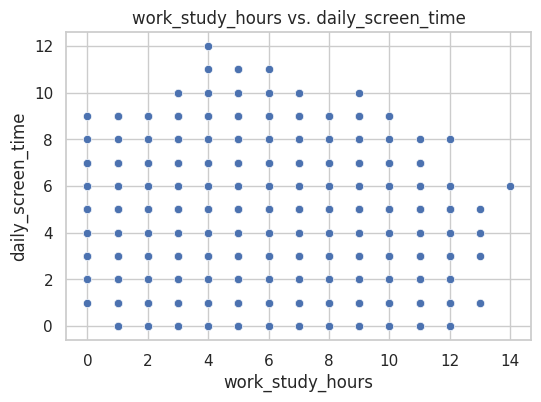

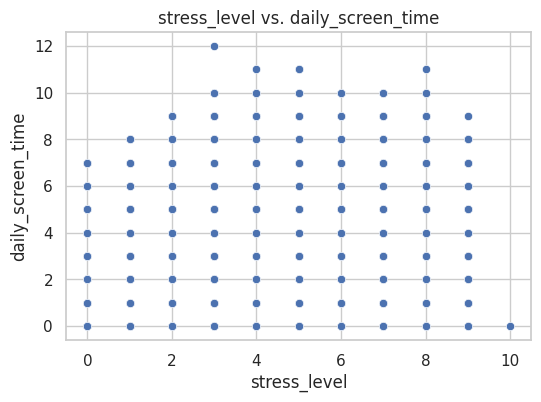

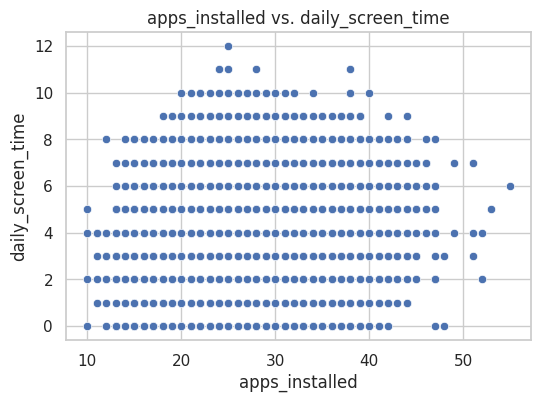

In [5]:

target = "daily_screen_time"

for col in num_cols:
    plt.figure(figsize=(6, 4))

    # Scatter points
    sns.scatterplot(data=df, x=col, y=target)

    plt.title(f"{col} vs. {target}")
    plt.show()


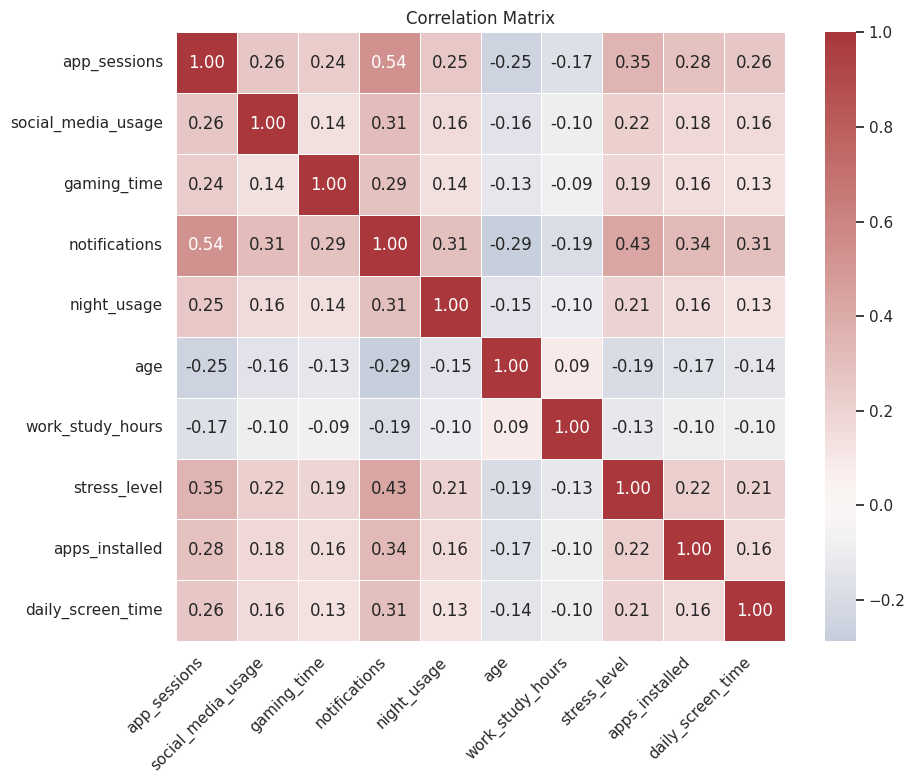

In [6]:


all_nums = num_cols + [target]
corr = df[all_nums].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
!pip install dash plotly pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [8]:
# Cell 2: Imports & Load Data
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load your dataset
df = pd.read_csv('mobile_addiction.csv')

# Drop any identifier column if needed
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')


print(df.head())
print(df.info())


   daily_screen_time  app_sessions  social_media_usage  gaming_time  \
0                  2            29                   0            0   
1                  6            29                   1            2   
2                  9            28                   2            0   
3                  6            39                   2            0   
4                  5            37                   3            1   

   notifications  night_usage  age  work_study_hours  stress_level  \
0             49            0   44                 5             3   
1             65            1   29                 5             9   
2             57            3   28                 7             5   
3             69            1   28                 6             8   
4             64            2   27                 4             5   

   apps_installed      addicted  
0              35  not addicted  
1              21      addicted  
2              39      addicted  
3              2

In [9]:
# Cell 3: Initialize Dash app
app = dash.Dash(__name__)
app.title = "Smartphone Addiction Dashboard"
server = app.server  # for deployment (e.g., Heroku)


In [10]:
# Cell 4: Layout with styling and default coloring
app.layout = html.Div([
    html.H1("Smartphone Usage & Social Media Addiction", style={'textAlign': 'center'}),

    # Axis & color selectors
    html.Div([
        html.Div([
            html.Label("X-axis:"),
            dcc.Dropdown(
                id='x-variable',
                options=[{'label': col, 'value': col} for col in df.select_dtypes('number').columns],
                value=df.select_dtypes('number').columns[0]
            )
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Div([
            html.Label("Y-axis:"),
            dcc.Dropdown(
                id='y-variable',
                options=[{'label': col, 'value': col} for col in df.select_dtypes('number').columns],
                value=df.select_dtypes('number').columns[1]
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginLeft': '2%'}),

        html.Div([
            html.Label("Color by:"),
            dcc.Dropdown(
                id='color-variable',
                options=[{'label': col, 'value': col} for col in df.columns],
                value='addicted',  # or None
                clearable=True
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginLeft': '2%'}),
    ], style={'padding': '10px'}),

    # Scatter Plot Output
    dcc.Graph(id='scatter-plot'),

    # Histogram selector
    html.Div([
        html.Label("Histogram Variable:"),
        dcc.Dropdown(
            id='hist-variable',
            options=[{'label': col, 'value': col} for col in df.select_dtypes('number').columns],
            value=df.select_dtypes('number').columns[0]
        )
    ], style={'width':'48%', 'display':'inline-block', 'padding':'10px'}),

    # Histogram Output
    dcc.Graph(id='histogram')
])


In [11]:
# Cell 5: Combined callback for both plots
from dash.dependencies import Input, Output

@app.callback(
    [
      Output('scatter-plot', 'figure'),
      Output('histogram',    'figure'),
    ],
    [
      Input('x-variable',    'value'),
      Input('y-variable',    'value'),
      Input('color-variable','value'),
      Input('hist-variable', 'value'),
    ]
)
def update_charts(x_col, y_col, color_col, hist_var):
    # scatter
    scatter_fig = px.scatter(
        df, x=x_col, y=y_col,
        color=color_col,
        title=f"{y_col} vs {x_col}",
        hover_data=df.columns
    )
    # histogram
    hist_fig = px.histogram(
        df, x=hist_var,
        title=f"Distribution of {hist_var}",
        marginal='box',
        nbins=30
    )
    return scatter_fig, hist_fig


In [12]:
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

**Regression**

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

df = pd.read_csv("mobile_addiction.csv")
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df['addicted'] = LabelEncoder().fit_transform(df['addicted'])


target = "notifications"  #  switched from daily_screen_time
X = df.drop(columns=["daily_screen_time", "addicted", target])
y = df[target]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(" R² Score:", r2)
print(" MSE:", mse)


 R² Score: 0.4915050319661456
 MSE: 83.9053167669873


In [14]:
#  Remove the target from features
features = ["app_sessions", "social_media_usage", "gaming_time",
            "night_usage", "age", "work_study_hours", "stress_level", "apps_installed"]
target = "notifications"

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr = LinearRegression().fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate performance
print(" MSE:", mean_squared_error(y_test, y_pred))
print(" R² Score:", r2_score(y_test, y_pred))

# Show feature importances
print("\n Coefficients:")
for feat, coef in zip(X.columns, lr.coef_):
    print(f"{feat:20s} : {coef:.3f}")


 MSE: 92.8449174481334
 R² Score: 0.43732798886864144

 Coefficients:
app_sessions         : 0.543
social_media_usage   : 1.231
gaming_time          : 1.288
night_usage          : 1.397
age                  : -0.127
work_study_hours     : -0.330
stress_level         : 1.066
apps_installed       : 0.283


In [16]:

from sklearn.linear_model import RidgeCV
from sklearn.metrics        import mean_squared_error, r2_score
import numpy as np

#  Define a wider grid of alphas
alphas = np.logspace(-3, 3, 13)

#  Fit RidgeCV (5-fold CV) to pick the best α
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
print("Best α:", ridge_cv.alpha_)


Best α: 31.622776601683793


In [17]:

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)

#  Predict & evaluate
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²: ", r2_score(y_test, y_pred_ridge))

#  Display coefficients
print("\nFeature coefficients:")
for feat, coef in zip(features, ridge.coef_):
    print(f"{feat:20s} → {coef:.3f}")


Ridge MSE: 92.85063894730033
Ridge R²:  0.4372933146233362

Feature coefficients:
app_sessions         → 0.543
social_media_usage   → 1.229
gaming_time          → 1.284
night_usage          → 1.393
age                  → -0.127
work_study_hours     → -0.330
stress_level         → 1.066
apps_installed       → 0.283


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_regressor = RandomForestRegressor(
    n_estimators=500,
    max_depth=30,
    min_samples_leaf=1,
    random_state=42
)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_regressor.predict(X_test_reg)

# Evaluate
print("Improved Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))
print("R²:", r2_score(y_test_reg, y_pred_rf))


Improved Random Forest Regressor:
MSE: 85.16217409951011
R²: 0.48388804589482004


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np



# Define features and target
X = df.drop(columns=["addicted"])
y = df["addicted"]

df['addicted'] = df['addicted'].map({'not addicted': 0, 'addicted': 1})

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split and reduce training size to 20%
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, test_size=0.8, random_state=42)  # Keep 20%

# Train
model = RandomForestClassifier(
    n_estimators=10,
    max_depth=2,
    max_features=2,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("=== Random Forest Classifier  ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Random Forest Classifier  ===
Accuracy: 0.9411331861662987
F1 Score (macro): 0.9411005294559653
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1382
           1       0.95      0.93      0.94      1336

    accuracy                           0.94      2718
   macro avg       0.94      0.94      0.94      2718
weighted avg       0.94      0.94      0.94      2718

Confusion Matrix:
 [[1311   71]
 [  89 1247]]


In [47]:
# Prepare classification data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
df = pd.read_csv("mobile_addiction.csv")
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df['addicted'] = LabelEncoder().fit_transform(df['addicted'])

# Features and target for classification
X = df.drop(columns=["addicted"])
y = df["addicted"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Apply extreme regularization and reduce sample support
svc_classifier = SVC(
    C=1e-5,
    kernel='linear',
    max_iter=100
)
svc_classifier.fit(X_train_clf, y_train_clf)
y_pred_svc = svc_classifier.predict(X_test_clf)

# Evaluation
print("=== Support Vector Classifier ===")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_svc))
print("Classification Report:\n", classification_report(y_test_clf,y_pred_svc))

=== Support Vector Classifier ===
Accuracy: 0.9543782192788816
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      1382
           1       0.92      1.00      0.96      1336

    accuracy                           0.95      2718
   macro avg       0.96      0.96      0.95      2718
weighted avg       0.96      0.95      0.95      2718



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [27]:
#  define your evaluation helper
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {model.score(X_test, y_test):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 1. reduce training size
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# 2. Add random noise
X_train_small = X_train_small + np.random.normal(0, 0.5, X_train_small.shape)
X_test_noisy = X_test + np.random.normal(0, 0.5, X_test.shape)

# 3. Train
model = KNeighborsClassifier(n_neighbors=50, weights='uniform')
model.fit(X_train_small, y_train_small)

# 4. Evaluate
y_pred = model.predict(X_test_noisy)

print("=== Final KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== Final KNN ===
Accuracy: 0.9433406916850625
Confusion Matrix:
 [[1323   59]
 [  95 1241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1382
           1       0.95      0.93      0.94      1336

    accuracy                           0.94      2718
   macro avg       0.94      0.94      0.94      2718
weighted avg       0.94      0.94      0.94      2718

